# 2017 DATA USED FROM AUGUST TO DECEMBER

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
milk = read_csv('comtrade_uk.csv', dtype={'Commodity Code':str})
milk.tail(2)

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
628,HS,2017,201709,September 2017,4,0,1,Imports,826,United Kingdom,...,NaN,NaN,NaN,NaN,126960.0,NaN,239527,NaN,NaN,0
629,HS,2017,201709,September 2017,4,0,1,Imports,826,United Kingdom,...,NaN,NaN,NaN,NaN,74161.0,NaN,261468,NaN,NaN,0


In [4]:
def milkType(code):
    if code == '0401': # neither concentrated nor sweetened
        return 'unprocessed'
    if code == '0402': # concentrated or sweetened
        return 'processed' 
    return 'unknown'

COMMODITY = 'Milk and cream'
milk[COMMODITY] = milk['Commodity Code'].apply(milkType)
MONTH = 'Period'
PARTNER = 'Partner'
FLOW = 'Trade Flow'
VALUE = 'Trade Value (US$)'
headings = [MONTH, PARTNER, FLOW, COMMODITY, VALUE]
milk = milk[headings]
milk.head()

,Period,Partner,Trade Flow,Milk and cream,Trade Value (US$)
0,201708,France,Exports,unprocessed,881428
1,201709,World,Exports,unprocessed,30968660
2,201709,Netherlands,Exports,unprocessed,21096
3,201708,Denmark,Imports,unprocessed,1361797
4,201708,Poland,Imports,unprocessed,419329


In [5]:
milk = milk[milk[PARTNER] != 'World']
milk.head()

,Period,Partner,Trade Flow,Milk and cream,Trade Value (US$)
0,201708,France,Exports,unprocessed,881428
2,201709,Netherlands,Exports,unprocessed,21096
3,201708,Denmark,Imports,unprocessed,1361797
4,201708,Poland,Imports,unprocessed,419329
5,201708,Romania,Imports,unprocessed,51787


In [6]:
grouped = milk.groupby([FLOW])
grouped[VALUE].aggregate(sum)

Trade Flow
Exports    324933254
Imports    193601244
Name: Trade Value (US$), dtype: int64

In [7]:
imports = milk[milk[FLOW] == 'Imports']
grouped = imports.groupby([PARTNER])
print('The UK imports from', len(grouped), 'countries.')
print('The 5 biggest exporters to the UK are:')
totalImports = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
totalImports.head()

The UK imports from 20 countries.
The 5 biggest exporters to the UK are:


Partner
Ireland        76712125
Netherlands    25315869
Germany        25258055
France         24038932
Belgium        22363284
Name: Trade Value (US$), dtype: int64

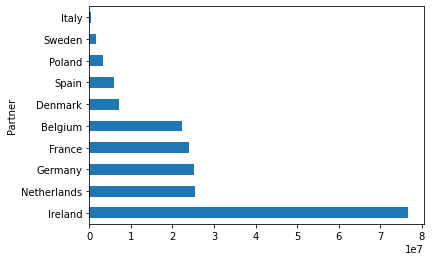

In [8]:
totalImports.head(10).plot(kind='barh')

In [9]:
exports = milk[milk[FLOW] == 'Exports']
grouped = exports.groupby([PARTNER])
print('The UK exports to', len(grouped), 'countries.')
print('The 5 biggest importers from the UK are:')
grouped[VALUE].aggregate(sum).sort_values(ascending=False,inplace=False).head()

The UK exports to 92 countries.
The 5 biggest importers from the UK are:


Partner
Ireland        155014441
China           59012967
Netherlands     21702790
Germany         17675586
France           8527602
Name: Trade Value (US$), dtype: int64

In [10]:
def buysEveryMonth(group):
    return len(group) == 10

grouped = exports.groupby([PARTNER])
regular = grouped.filter(buysEveryMonth)
regular[(regular[MONTH] == 201501) & (regular[COMMODITY] == 'processed')]

,Period,Partner,Trade Flow,Milk and cream,Trade Value (US$)


In [11]:
regular[VALUE].sum() / exports[VALUE].sum()

0.877965675990799

In [12]:
countries = pivot_table(milk, index=[PARTNER], columns=[FLOW], 
                        values=VALUE, aggfunc=sum)
countries.head()

Trade Flow,Exports,Imports
Partner,,
Algeria,549659.0,NaN
Angola,515129.0,NaN
Antigua and Barbuda,29209.0,NaN
Australia,180965.0,NaN
Austria,4719.0,42814.0


In [13]:
countries.dropna()

Trade Flow,Exports,Imports
Partner,,
Austria,4719.0,42814.0
Belgium,8460331.0,22363284.0
Bulgaria,413.0,41301.0
Czech Rep.,28316.0,170977.0
Denmark,51539.0,7230721.0
France,8527602.0,24038932.0
Germany,17675586.0,25258055.0
Greece,72200.0,137117.0
Ireland,155014441.0,76712125.0
